In [1]:
import pandas as pd

previous_apps = pd.read_csv('data/previous_application.csv')

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64
count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+0

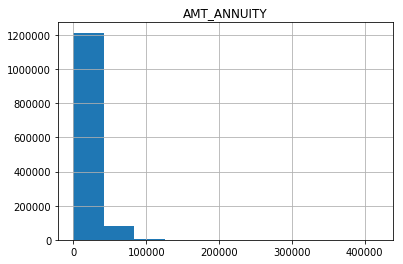

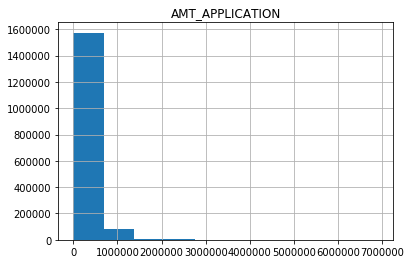

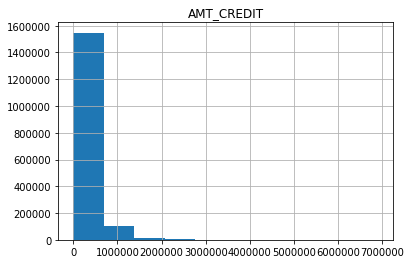

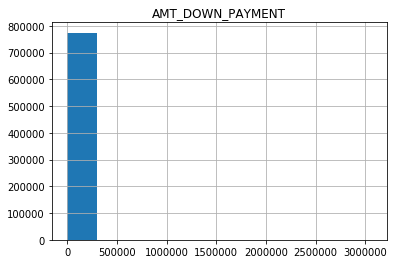

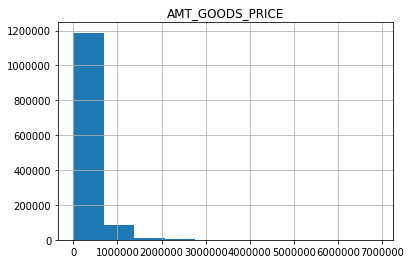

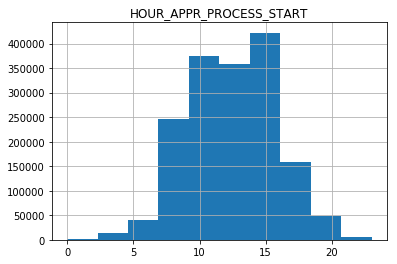

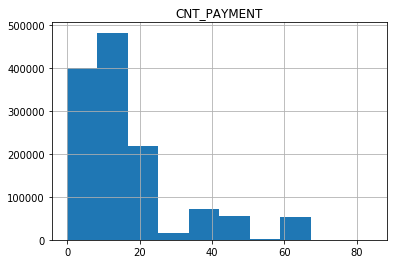

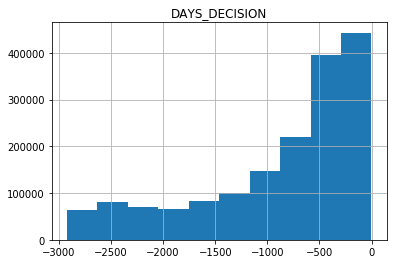

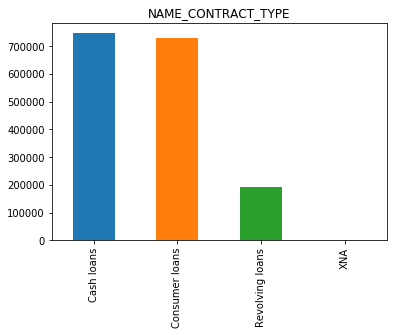

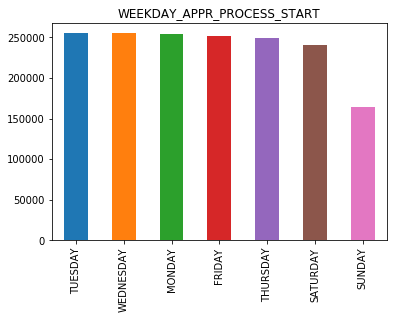

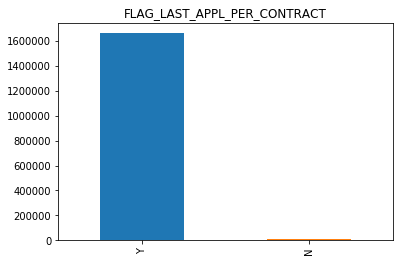

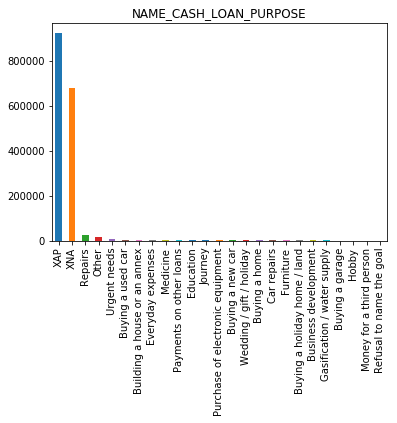

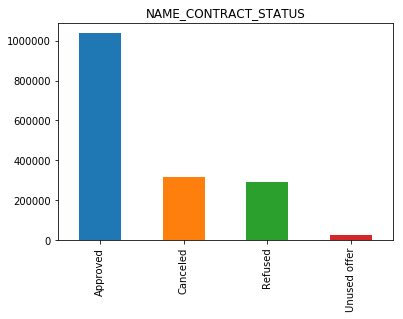

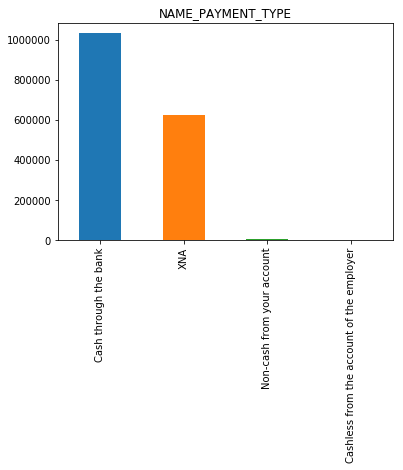

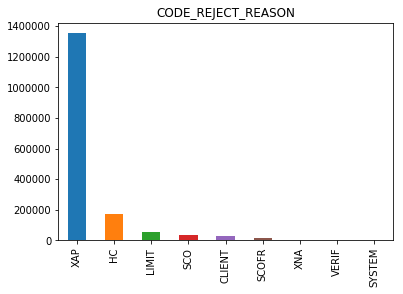

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

numeric_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'CNT_PAYMENT', 'DAYS_DECISION']
categorical_cols = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON']

for col in numeric_cols:
    plt.figure()
    print(previous_apps[col].describe())
    previous_apps[col].hist()
    plt.title(col)
    
for col in categorical_cols:
    plt.figure()
    print(previous_apps[col].describe())
    previous_apps[col].value_counts().plot(kind='bar')
    plt.title(col)

In [9]:
previous_apps['AMT_CREDIT_DIFF'] = previous_apps['AMT_APPLICATION'] - previous_apps['AMT_CREDIT']

In [14]:
groups = previous_apps.groupby(by='SK_ID_CURR')

agg_functions = {
    'SK_ID_CURR': 'count',
    'AMT_ANNUITY': ['mean','median'],
    'AMT_CREDIT_DIFF': ['mean','median'],
    'DAYS_DECISION': ['mean','median'],
}

previous_apps_summary = groups.agg(agg_functions)

In [20]:
flattened_previous_apps_summary = pd.DataFrame()
for col1,col2 in previous_apps_summary.columns:
    flattened_name = col1 + '_' + col2
    flattened_previous_apps_summary[flattened_name] = previous_apps_summary[col1][col2]

flattened_previous_apps_summary.to_csv('data/summary/previous_apps_summary.csv')